# **Data Mining Project** 
# Task 4: TimeSeries
Pistolesi Veronica, Poli Francesca

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

## Data Loading and creation of useful lists

In [ ]:
tweets_scores = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/tweets_scores.csv', lineterminator='\n', index_col=False)

In [ ]:
users = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n', index_col=False)

In [ ]:
users = users[['user_id', 'bot']]

In [ ]:
tweets_scores.head()

,user_id,created_at,SuccessScore,bot
0,722623,2019-01-01,-1.000000,0
1,722623,2019-01-02,-1.000000,0
2,722623,2019-01-03,1.549296,0
3,722623,2019-01-04,1626.393443,0
4,722623,2019-01-05,1.818182,0


In [ ]:
scores = tweets_scores.groupby('user_id')['SuccessScore'].apply(list)
scores.head()

user_id
722623     [-1.0, -1.0, 1.5492957746478877, 1626.39344262...
755746     [-1.0, -1.0, 0.0, 0.0, 0.0, 0.1639344262295082...
806975     [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....
887281     [-1.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0...
1382561    [-1.0, -1.0, 60.0940070505288, 0.4480651731160...
Name: SuccessScore, dtype: object

In [ ]:
scores = scores.to_frame()

In [ ]:
ts_users = scores.merge(users, on='user_id')

In [ ]:
ts_users.head()

,user_id,SuccessScore,bot
0,722623,"[-1.0, -1.0, 1.5492957746478877, 1626.39344262...",0
1,755746,"[-1.0, -1.0, 0.0, 0.0, 0.0, 0.1639344262295082...",0
2,806975,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0
3,887281,"[-1.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0...",0
4,1382561,"[-1.0, -1.0, 60.0940070505288, 0.4480651731160...",0


In [ ]:
#list(ts_users['SuccessScore'])[0]

In [ ]:
ts = pd.Series(ts_users['SuccessScore'])

In [ ]:
#ts[0]

In [ ]:
i_bot = []
i_human = []
for i in range(len(list(ts_users['bot']))):
  if list(ts_users['bot'])[i] == 1:
    i_bot.append(i)
  if list(ts_users['bot'])[i] == 0:
    i_human.append(i)

In [ ]:
bool(set(i_bot) & set(i_human))

False

In [ ]:
#ts[i_bot[0]]

# TimeSeries Analysis
Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. T
ime is a crucial variable because it shows how the data adjusts over the course of the data points as well as the final results. It provides an additional source of information and a set order of dependencies between the data. 


## Bot


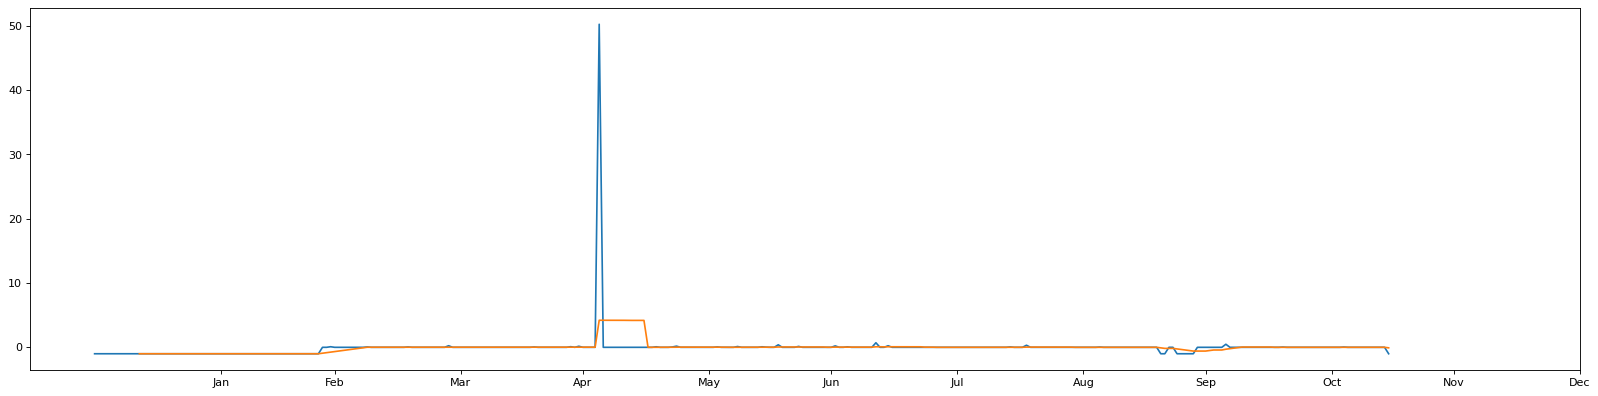

In [ ]:
# plot TimeSeries of the first bot
figure(figsize=(25, 6), dpi=80)

plt.plot(ts[i_bot[0]])
plt.plot(pd.Series(ts[i_bot[0]]).rolling(window=12).mean())

#plt.ylim(-1,50000)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

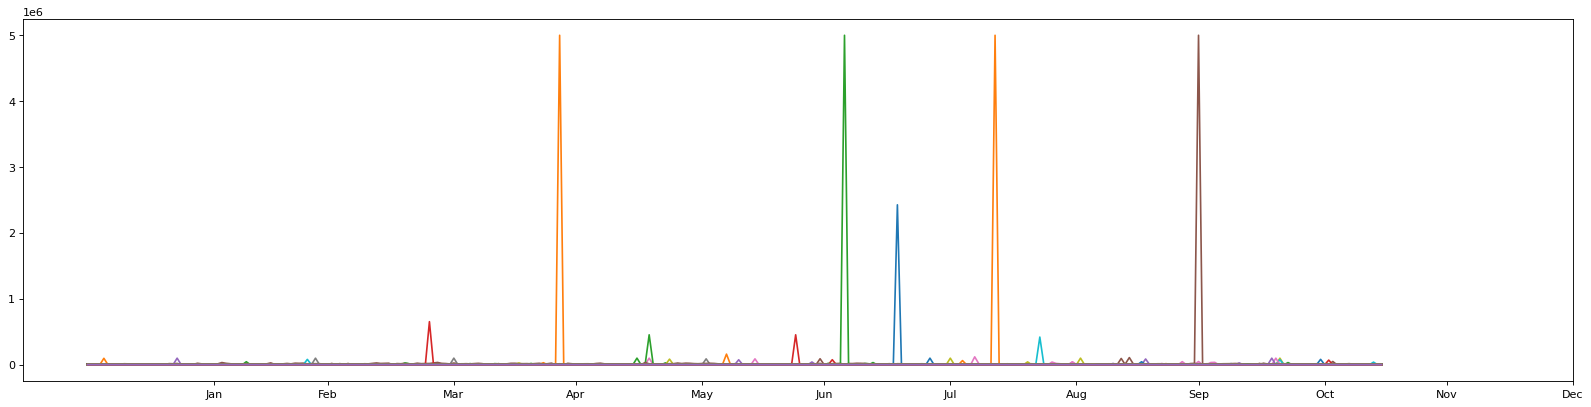

In [ ]:
# plot TimeSeries of all bot
figure(figsize=(25, 6), dpi=80)

for i in i_bot:
  plt.plot(pd.Series(ts[i]))

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

### Offset Translation

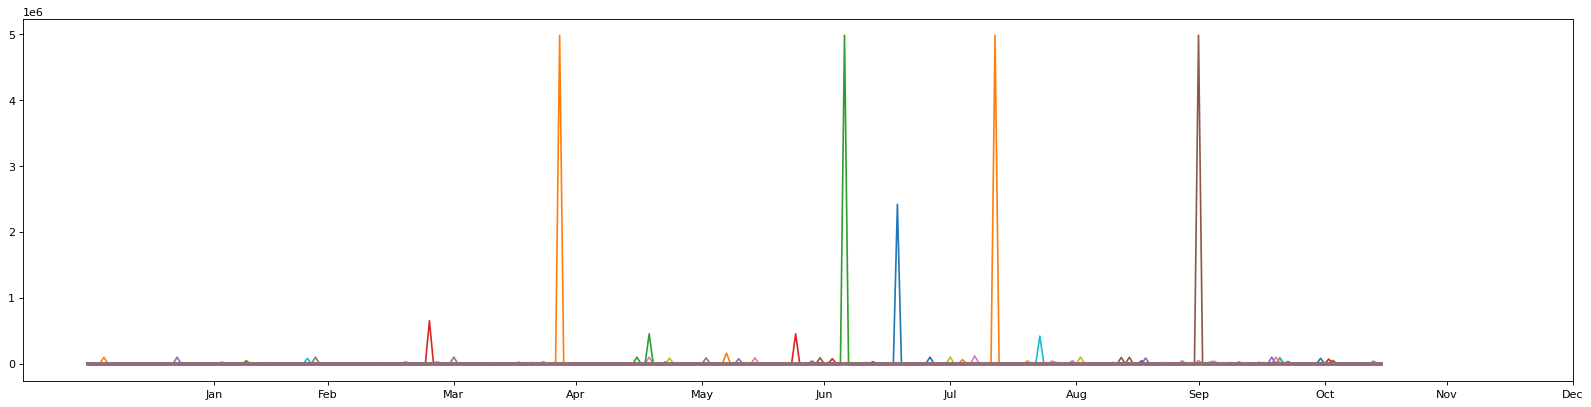

In [ ]:
# plot TimeSeries of all bot
figure(figsize=(25, 6), dpi=80)

for i in i_bot:
  plt.plot( pd.Series(ts[i]) - pd.Series(pd.Series(ts[i])).mean() )

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

### Amplitude Scaling

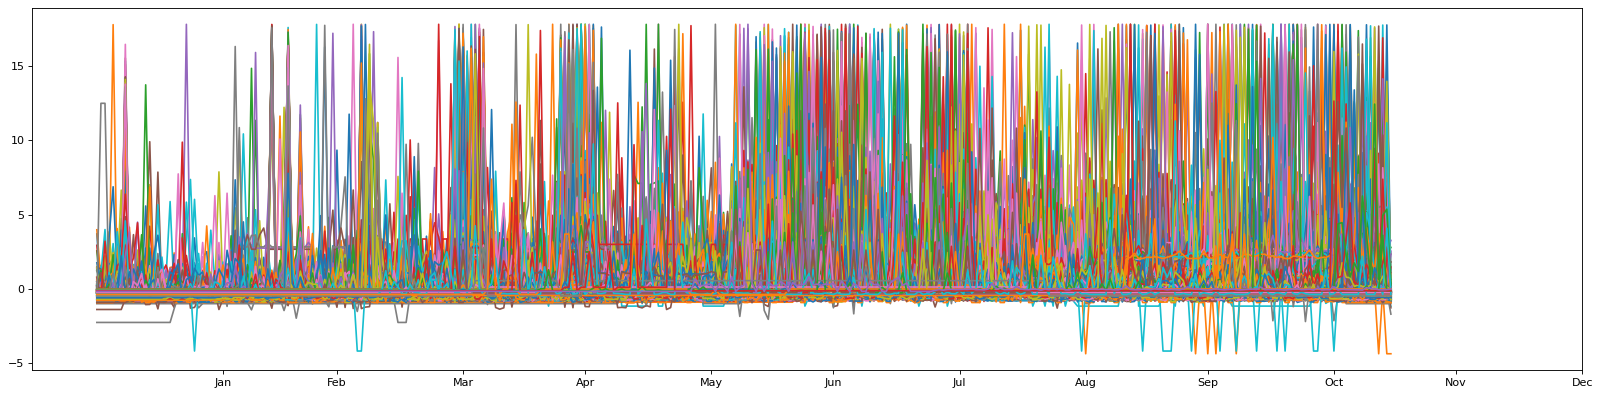

In [ ]:
# plot TimeSeries of all bot
figure(figsize=(25, 6), dpi=80)

for i in i_bot:
  plt.plot( ( pd.Series(ts[i]) - pd.Series(ts[i]).mean() ) / pd.Series(ts[i]).std() )

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

## Human

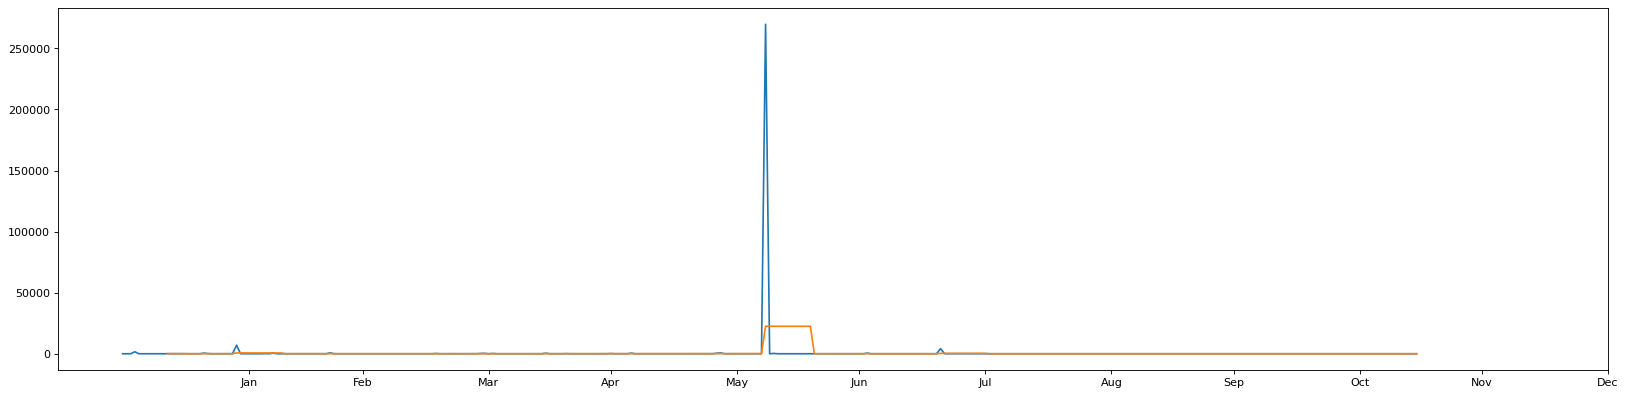

In [ ]:
# plot TimeSeries of the first human
figure(figsize=(25, 6), dpi=80)

plt.plot(pd.Series(ts[i_human[0]]))
plt.plot(pd.Series(ts[i_human[0]]).rolling(window=12).mean())

#plt.ylim(-1,50000)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

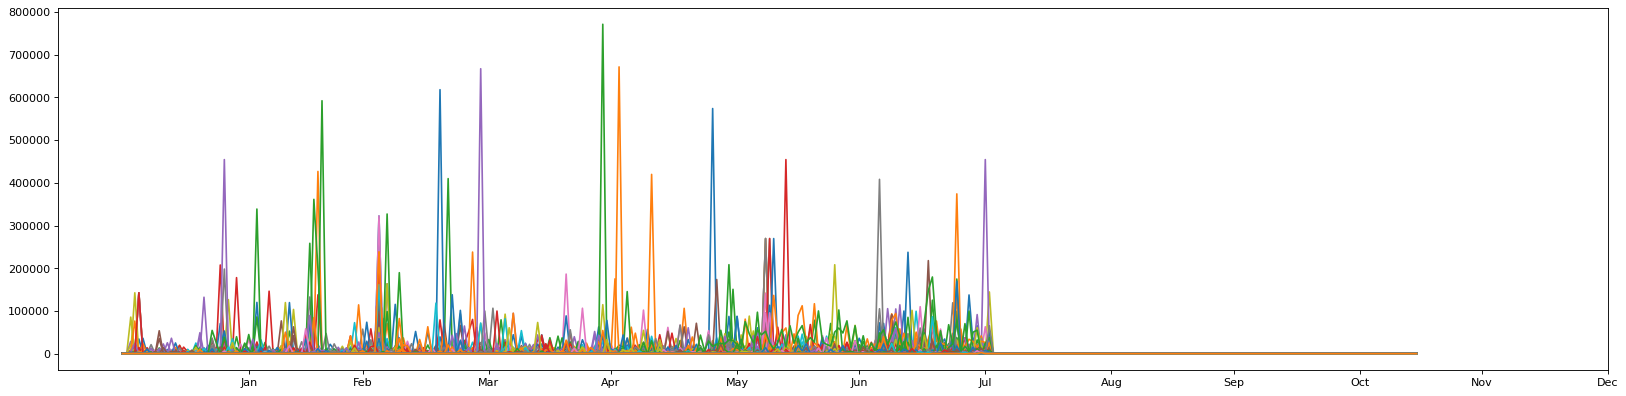

In [ ]:
# plot TimeSeries of all the humans
figure(figsize=(25, 6), dpi=80)

for i in i_human:
  plt.plot(pd.Series(ts[i]))

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

### Offset Translation

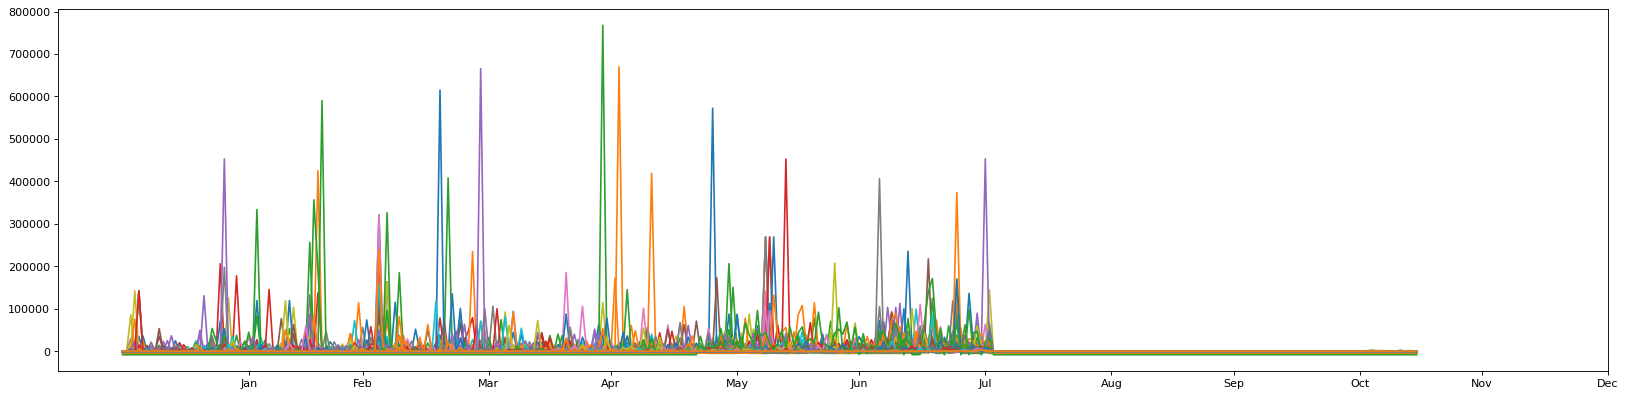

In [ ]:
# plot TimeSeries of all the humans
figure(figsize=(25, 6), dpi=80)

for i in i_human:
  plt.plot( pd.Series(ts[i]) - pd.Series(ts[i]).mean() )

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

### Amplitude Scaling

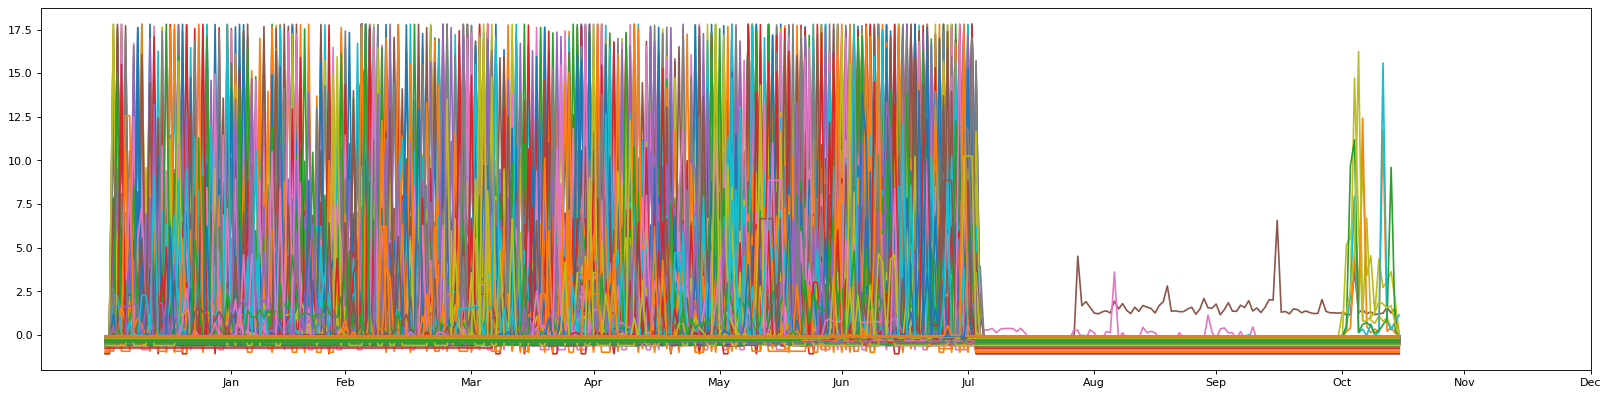

In [ ]:
# plot TimeSeries of all the humans
figure(figsize=(25, 6), dpi=80)

for i in i_human:
  plt.plot( ( pd.Series(ts[i]) - pd.Series(ts[i]).mean() ) / pd.Series(ts[i]).std() )

#plt.ylim(-1,500)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlim(0,365)
plt.show()

## Bot vs Human

In [ ]:
random_bot = i_bot[1]
random_human = i_human[1]

In [ ]:
ts_bot = pd.Series(ts[random_bot])
ts_human = pd.Series(ts[random_human])

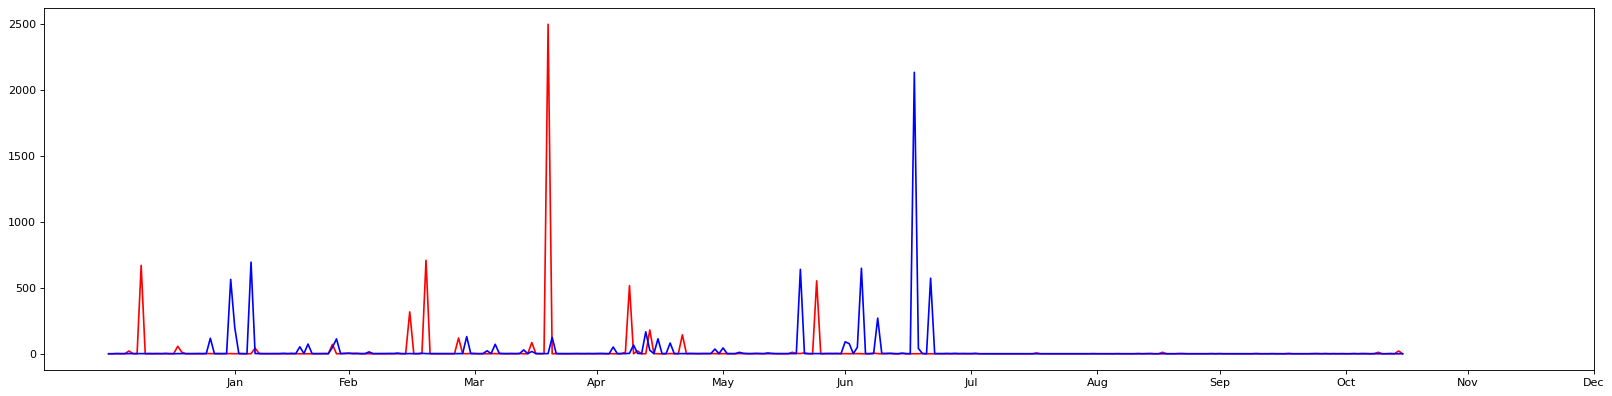

In [ ]:
figure(figsize=(25, 6), dpi=80)

plt.plot( ts_bot , color="r")
plt.plot( ts_human , color="b")

plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Offset Transformation

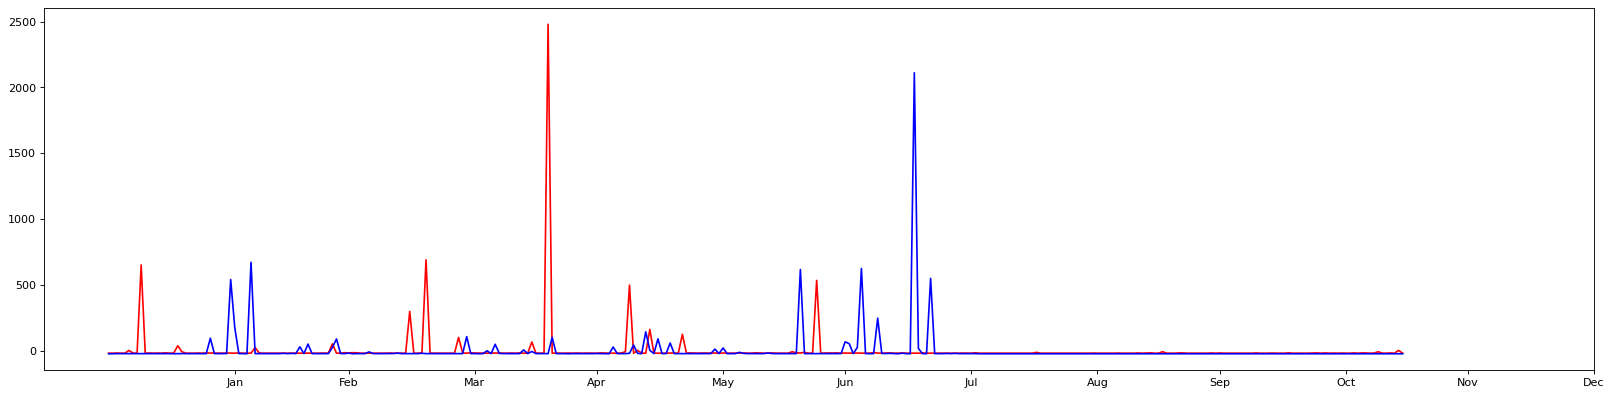

In [ ]:
# Offset Transformation
figure(figsize=(25, 6), dpi=80)

plt.plot( ts_bot - ts_bot.mean() , color="r")
plt.plot( ts_human - ts_human.mean() , color="b")

plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Amplitude Scaling

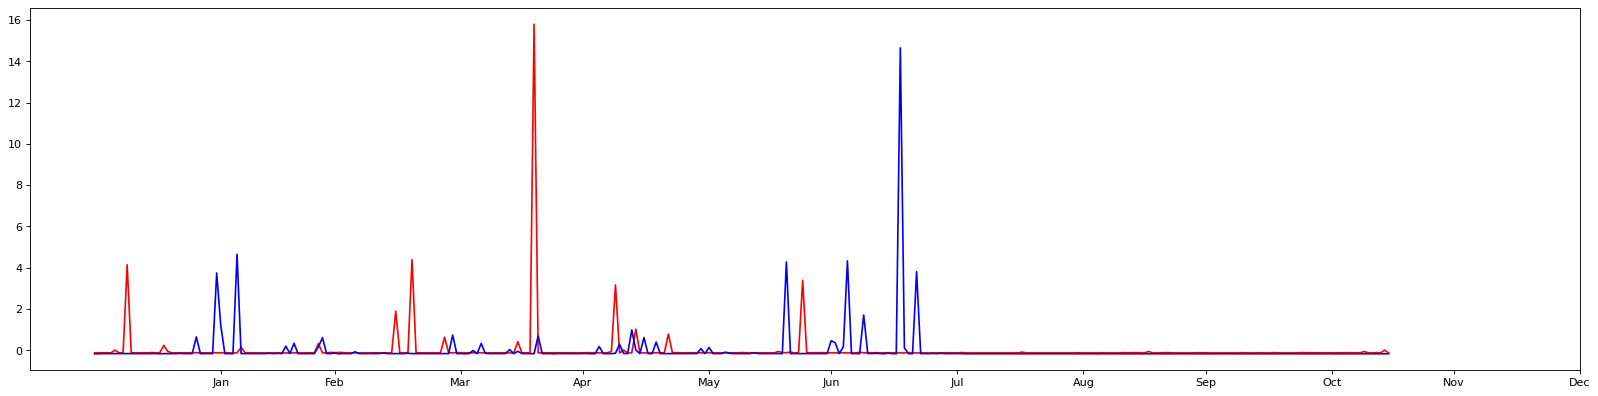

In [ ]:
# Amplitude Scaling
figure(figsize=(25, 6), dpi=80)

plt.plot( (ts_bot - ts_bot.mean()) / ts_bot.std() , color="r")
plt.plot( (ts_human - ts_human.mean()) / ts_human.std() , color="b")

plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Linear Trend (bot)

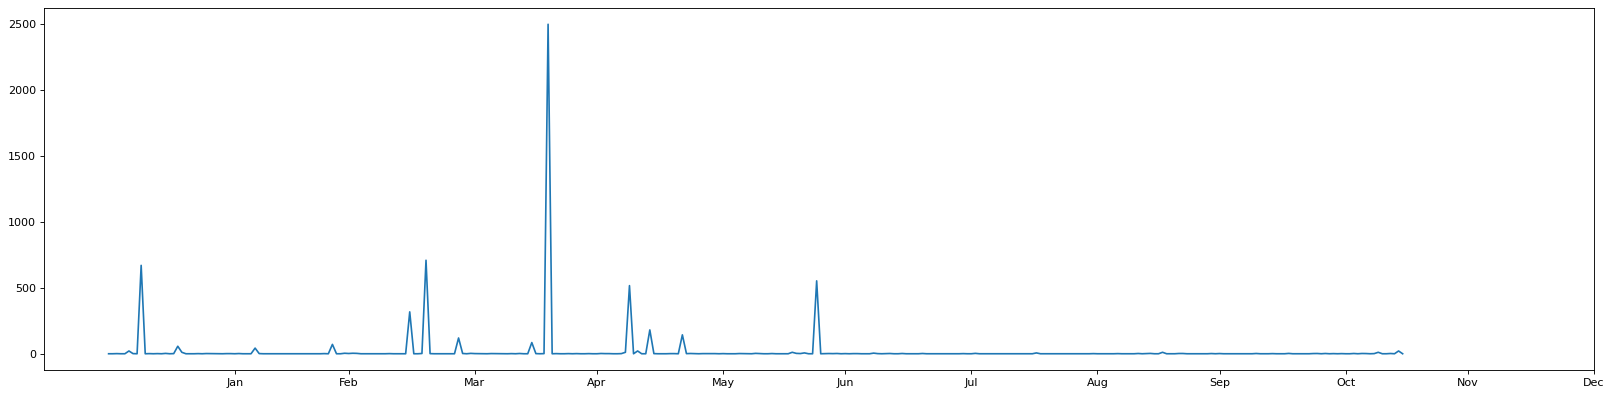

In [ ]:
figure(figsize=(25, 6), dpi=80)

plt.plot(ts_bot)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

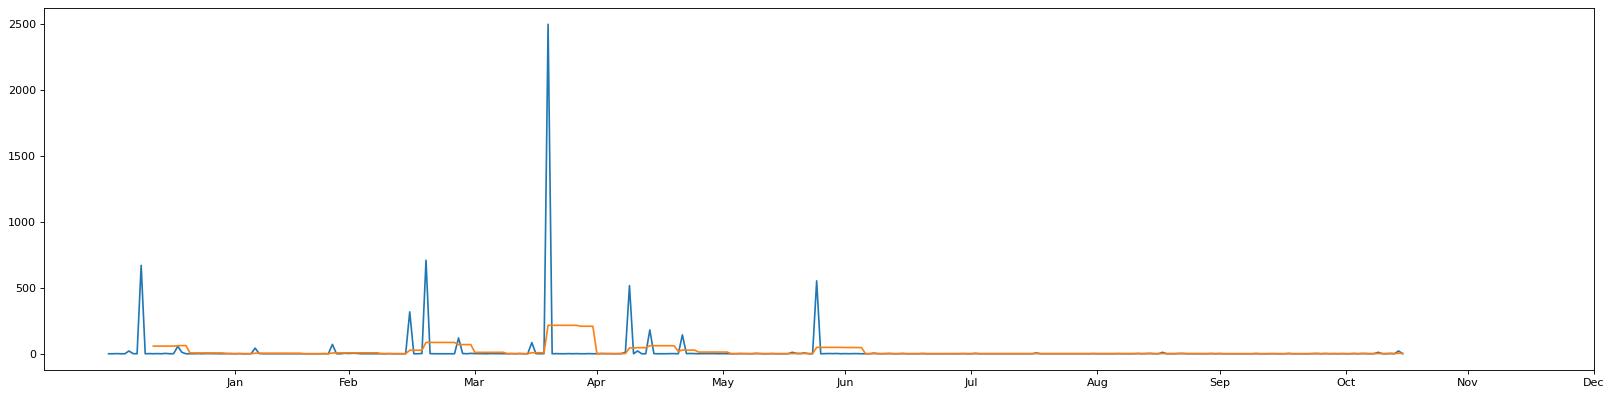

In [ ]:
figure(figsize=(25, 6), dpi=80)

plt.plot(ts_bot)
plt.plot(ts_bot.rolling(window=12).mean())
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

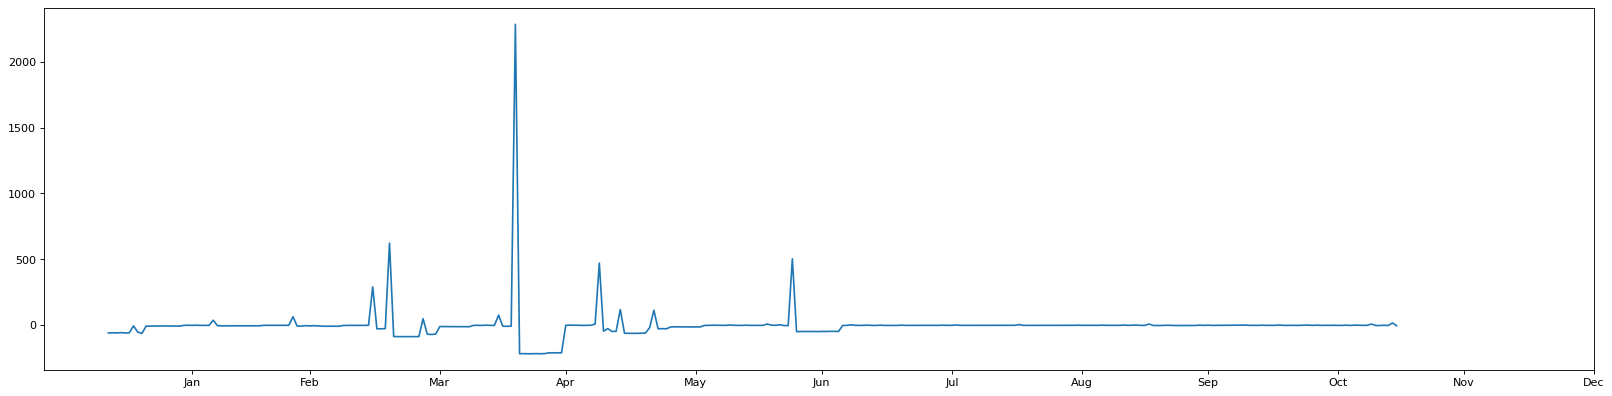

In [ ]:
figure(figsize=(25, 6), dpi=80)

ts_shift = ts_bot - ts_bot.rolling(window=12).mean()
plt.plot(ts_shift)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Linear Trend (human)

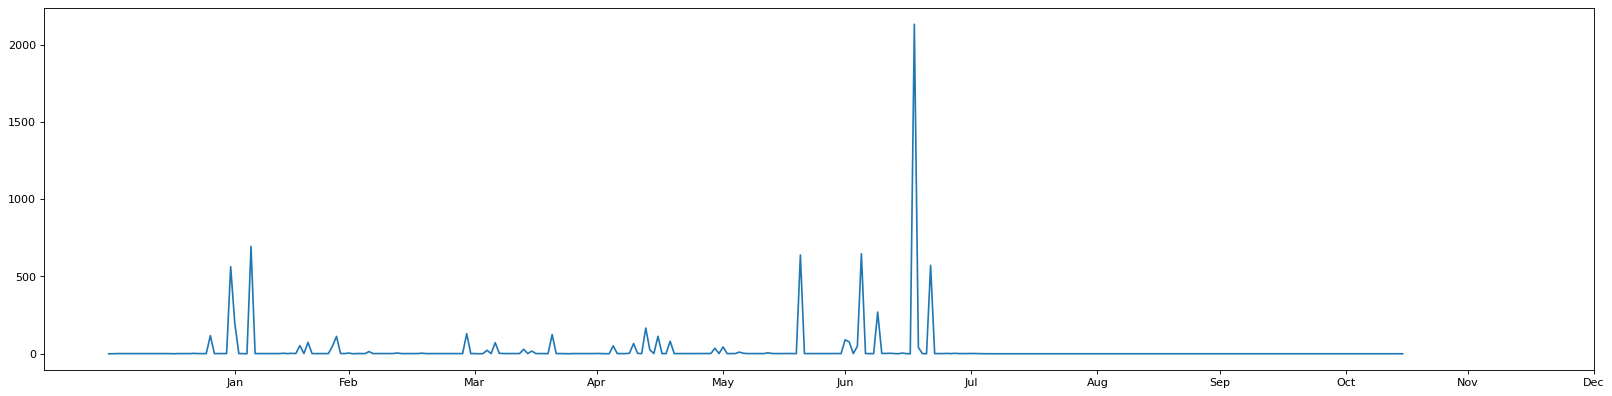

In [ ]:
figure(figsize=(25, 6), dpi=80)

plt.plot(ts_human)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

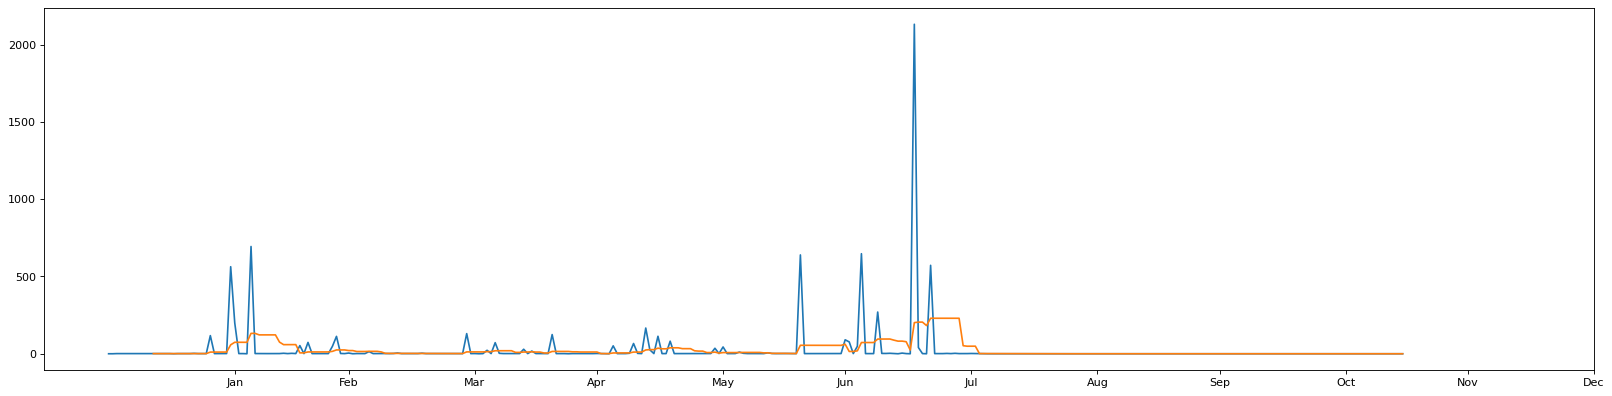

In [ ]:
figure(figsize=(25, 6), dpi=80)

plt.plot(ts_human)
plt.plot(ts_human.rolling(window=12).mean())
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

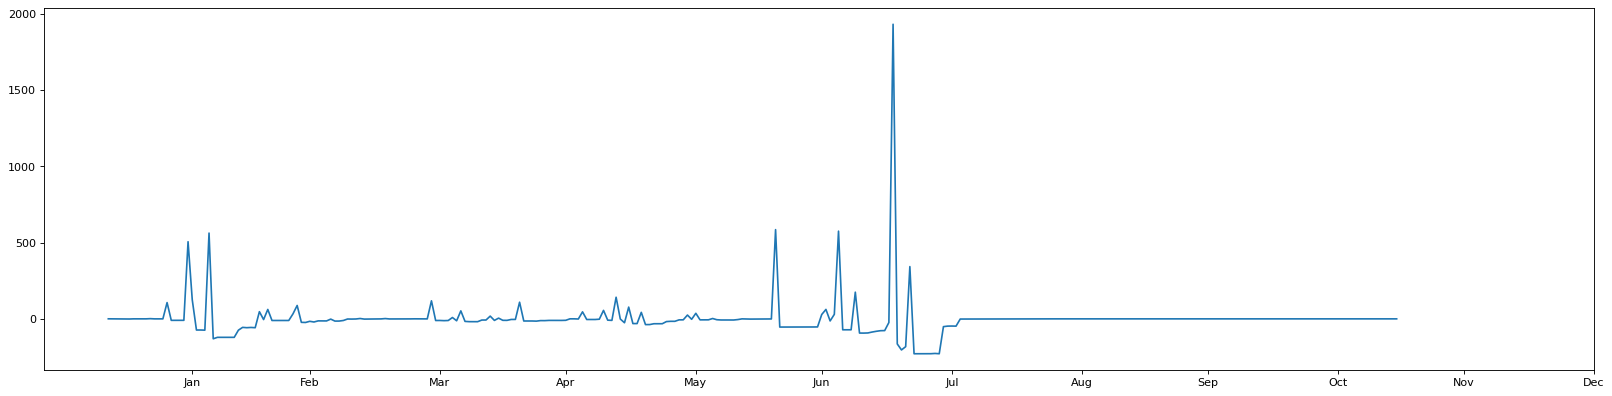

In [ ]:
figure(figsize=(25, 6), dpi=80)

ts_shift = ts_human - ts_human.rolling(window=12).mean()
plt.plot(ts_shift)
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Noise 

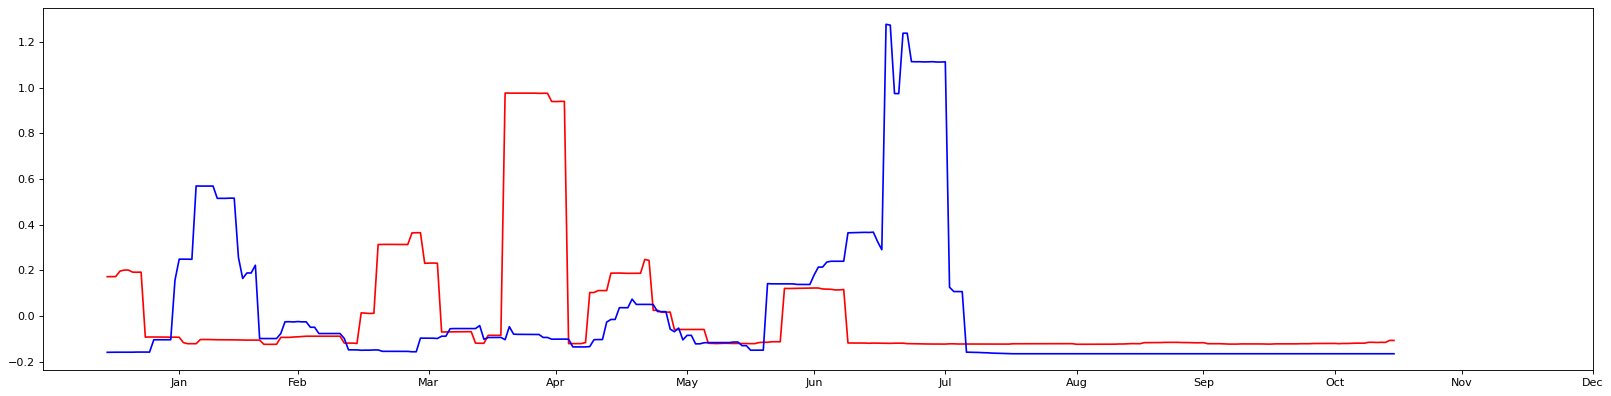

In [ ]:
#noise can be removed by using a moving average to smooth the time series

figure(figsize=(25, 6), dpi=80)

w = 15
plt.plot(((ts_bot - ts_bot.mean())/ts_bot.std()).rolling(window=w).mean(), color="r")
plt.plot(((ts_human - ts_human.mean())/ts_human.std()).rolling(window=w).mean(), color="b")
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

An alternative: tslearn. It is a Python package for time series analysis. It has 3 preprocessing for time series: scaler mean-variance, scaler min-max, resemple. 

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Mean-Variance Scaler

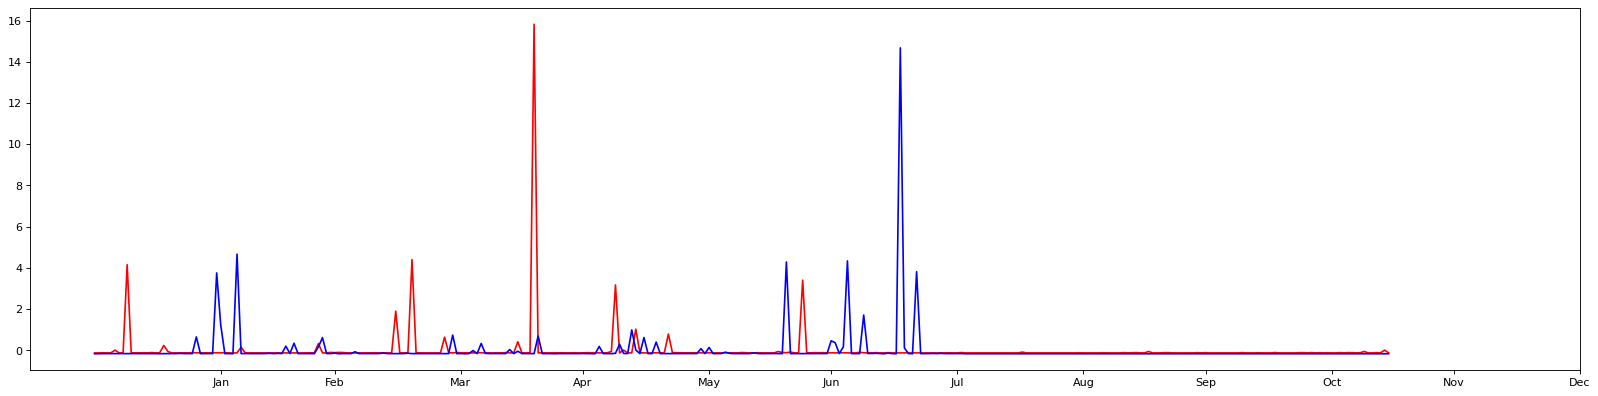

In [ ]:
#scaler mean variance
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

figure(figsize=(25, 6), dpi=80)

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
ts_bot_scaled = scaler.fit_transform(ts_bot.values.reshape(1, -1)).flatten()
ts_human_scaled = scaler.fit_transform(ts_human.values.reshape(1, -1)).flatten()

plt.plot(ts_bot_scaled, color="r")
plt.plot(ts_human_scaled, color="b")
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Min-max scaler

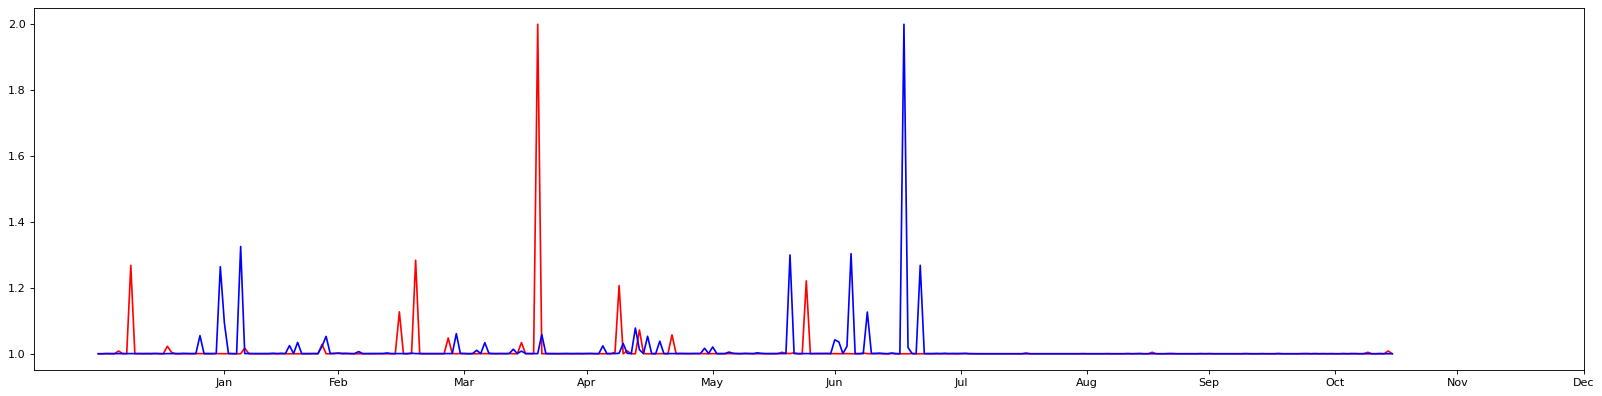

In [ ]:
#scaler min-max
from tslearn.preprocessing import TimeSeriesScalerMinMax

figure(figsize=(25, 6), dpi=80)

scaler = TimeSeriesScalerMinMax(value_range=(1., 2.))  
ts_bot_scaled = scaler.fit_transform(ts_bot.values.reshape(1, -1)).flatten()
ts_human_scaled = scaler.fit_transform(ts_human.values.reshape(1, -1)).flatten()

plt.plot(ts_bot_scaled, color="r")
plt.plot(ts_human_scaled, color="b")
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Resampler

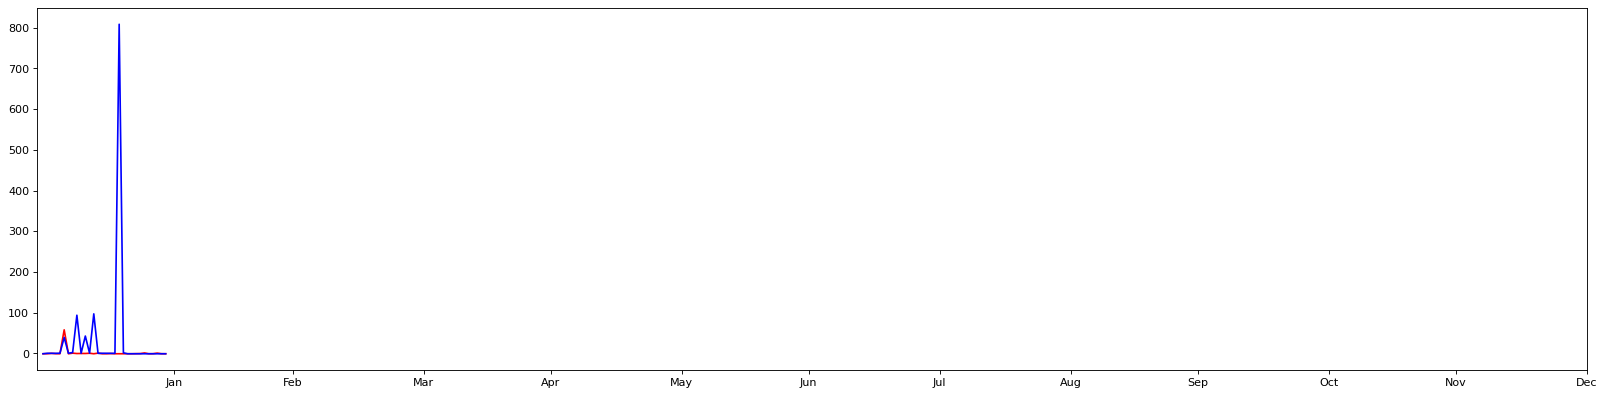

In [ ]:
#resampler
#Resampler for time series. 
#Resample time series so that they reach the target size.
from tslearn.preprocessing import TimeSeriesResampler

figure(figsize=(25, 6), dpi=80)

scaler = TimeSeriesResampler(sz=30)  
ts_bot_scaled = scaler.fit_transform(ts_bot.values.reshape(1, -1)).flatten()
ts_human_scaled = scaler.fit_transform(ts_human.values.reshape(1, -1)).flatten()

plt.plot(ts_bot_scaled, color="r")
plt.plot(ts_human_scaled, color="b")
plt.xticks([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Distance between 2 time series: ts_bot and ts_human
We can calculate the distance between 2 time series in different ways: euclidean, hamming, cityblock etc. 

In [ ]:
from scipy.spatial.distance import euclidean, cityblock

In [ ]:
dist = euclidean(ts_bot, ts_human)
dist

3833.7105948516623

In [ ]:
dist = cityblock(ts_bot, ts_human)
dist

13474.963361012002

### Dynamic Time Warping 
It is a similarity measure between 2 time series. It oputputs the similarity score. The idea is that, differently from the euclidean distance, given the matrix of distance between two time series, the dtw can freely move outside the diagonal of the matrix. These cells are actually temporally shifted points in the 2 time series. 


There are many parameters to set: global_constraint, it can be “itakura” or “sakoe_chiba” or None (that is the deafult). If None is set, then there is no constraint, otherwise the dtw can only move in a range of distance from the diagonal. If global_constraint = “itakura”, then you have to set also itakura_max_slope with a float: the itakura method creates a parallelogram hence you have to set the constraint slope. If the global method is sakoe_chiba, then you have to set sakoe_chiba_radius with an integer.  
NB: if you set both sakoe_chiba_radius and itakura_max_slope the method infer which one is better.

In [ ]:
#this applies euclidean distance 
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [ ]:
#deafult one 
dist = dtw(ts_bot, ts_human)
dist

999.5339375809607

In [ ]:
#deafult + path selected 
dist = dtw_path(ts_bot, ts_human)
dist

([(0, 0),
  (1, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (2, 7),
  (2, 8),
  (2, 9),
  (2, 10),
  (2, 11),
  (2, 12),
  (2, 13),
  (2, 14),
  (2, 15),
  (2, 16),
  (2, 17),
  (2, 18),
  (2, 19),
  (2, 20),
  (2, 21),
  (2, 22),
  (3, 23),
  (4, 24),
  (5, 25),
  (5, 26),
  (5, 27),
  (5, 28),
  (5, 29),
  (5, 30),
  (5, 31),
  (6, 32),
  (6, 33),
  (7, 34),
  (8, 35),
  (9, 36),
  (10, 37),
  (10, 38),
  (10, 39),
  (11, 40),
  (12, 41),
  (13, 42),
  (14, 43),
  (14, 44),
  (14, 45),
  (14, 46),
  (14, 47),
  (14, 48),
  (14, 49),
  (14, 50),
  (14, 51),
  (14, 52),
  (14, 53),
  (14, 54),
  (14, 55),
  (14, 56),
  (14, 57),
  (14, 58),
  (14, 59),
  (14, 60),
  (14, 61),
  (14, 62),
  (14, 63),
  (14, 64),
  (15, 65),
  (16, 66),
  (16, 67),
  (16, 68),
  (16, 69),
  (16, 70),
  (16, 71),
  (16, 72),
  (16, 73),
  (16, 74),
  (16, 75),
  (16, 76),
  (16, 77),
  (16, 78),
  (16, 79),
  (16, 80),
  (16, 81),
  (16, 82),
  (16, 83),
  (16, 84),
  (16, 85),
  (16, 86),
  (

In [ ]:
#dist[0]

### Can we visualize the path took?

In [ ]:
#we compute the path 
path, dist_p = dtw_path(ts_bot[:10], ts_human[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=3)
dist_p

669.3984576460583

In [ ]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 9)]

In [ ]:
from scipy.spatial.distance import cdist

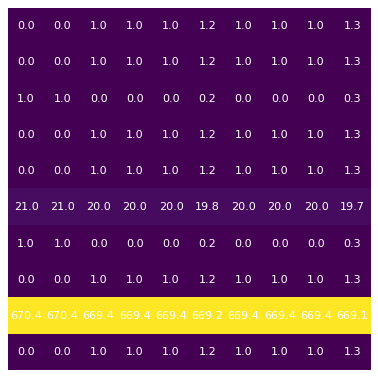

In [ ]:
figure(figsize=(10, 6), dpi=80)

mat = cdist(ts_bot.values[:10].reshape(-1,1), ts_human.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

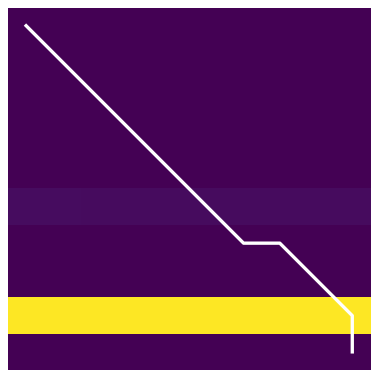

In [ ]:
#we compute the distance (default euclidean)
figure(figsize=(10, 6), dpi=80)

mat = cdist(ts_bot.values[:10].reshape(-1,1), ts_human.values[:10].reshape(-1,1))
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

### DTW: another implementation
From pyts there is another implementation of DTW. Here there are different parameters to set: 

1. dist, to select the distance used (square, absolute, precomputed or callable), 

2. the method: fast, itakura, sakoechiba etc., 

3. options: to specify the window size for sakoechiba, the max_slope for itakura or the radius for fast. 

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#here you can change the distance measure 
from pyts.metrics import dtw as dtw2

In [ ]:
sim, path = dtw2(ts_bot[:10].ravel(), ts_human[:10].ravel(), dist='square', method='itakura', return_path=True)

In [ ]:
path[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
new_p = list()
for i in range(0, len(path[0])):
    new_p.append((path[0][i], path[1][i]))

In [ ]:
new_p

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

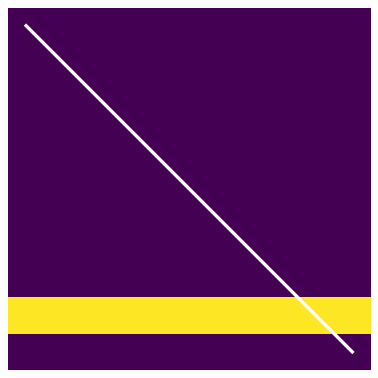

In [ ]:
#we compute the distance (default euclidean)
figure(figsize=(10, 6), dpi=80)

mat = cdist(ts_bot.values[:10].reshape(-1,1), ts_human.values[:10].reshape(-1,1), 'sqeuclidean')
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in new_p], [i for (i, j) in new_p], "w-", linewidth=3.)
plt.show()

## Structure-based similarity
The idea is to extract features from the time series, create a feature vector and use it to measure similarity.

In [ ]:
#define a function to extract statistical features
import scipy.stats as stats
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
features1 = calculate_features(ts_bot)
features2 = calculate_features(ts_human)

In [ ]:
list(features1.values())

[18.551369256646236,
 156.71200533720133,
 24558.65261680702,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 1.493312352478362,
 1.0,
 0.11837873694953216,
 13.151301439602216,
 196.20807980684785]

In [ ]:
list(features2.values())

[22.85705700886371,
 143.8105146920869,
 20681.464136002945,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.196078431372549,
 10.357417559937776,
 1.196078431372549,
 0.15893870526646134,
 11.093169881089539,
 147.32684138281633]

Compute the distance between the features extracted from the 2 time series

In [ ]:
euclidean(list(features1.values()), list(features2.values()))

3877.5314009512304

## Compression-based dissimilarity

d(x, y) = CDM(x, y) = c(x,y)/c(x)+c(y)

In [ ]:
import zlib
#definition of CDM
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [ ]:
ts_bot_enc = (' '.join([str(v) for v in ts_bot])).encode('utf-8')
ts_human_enc = (' '.join([str(v) for v in ts_human])).encode('utf-8')

In [ ]:
CDM(ts_bot_enc, ts_human_enc)

0.9691516709511568

## Approximation of time series

Compression and approximation are 2 ways for dimensionality reduction: compression is in a space not always understandable, while the approximation is in a simpler space, always understandable. 

### Piece-wise Aggregate Approximation

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation
#first re-scale the time series with the functions seen above.
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
ts_bot = scaler.fit_transform(ts_bot.values.reshape(1,-1))
ts_human = scaler.fit_transform(ts_human.values.reshape(1,-1))


In [ ]:
#select the number of segments to compute 
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_bot_paa = paa.fit_transform(ts_bot)
paa_dataset_inv1 = paa.inverse_transform(ts_bot_paa)
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_human_paa = paa.fit_transform(ts_human)
paa_dataset_inv2 = paa.inverse_transform(ts_human_paa)

In [ ]:
ts_bot_paa

array([[[ 0.03423579],
        [-0.0980579 ],
        [ 0.1134613 ],
        [ 0.41037124],
        [ 0.05755149],
        [-0.003109  ],
        [-0.12142004],
        [-0.12326996],
        [-0.11968326],
        [-0.12105376]]])

In [ ]:
paa_dataset_inv1

array([[[ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [ 0.03423579],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0.0980579 ],
        [-0

### Symbolic Aggregate Approximation

In [ ]:
from tslearn.piecewise import SymbolicAggregateApproximation
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_bot_sax = sax.fit_transform(ts_bot)
sax_dataset_inv1 = sax.inverse_transform(ts_bot_sax)
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_human_sax = sax.fit_transform(ts_human)
sax_dataset_inv2 = sax.inverse_transform(ts_human_sax)

### One Dymensional Symbolc Aggregate Approximation

In [ ]:
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_bot_sax1d = one_d_sax.fit_transform(ts_bot)
one_d_sax_dataset_inv1 = one_d_sax.inverse_transform(ts_bot_sax1d)

ts_human_sax1d = one_d_sax.fit_transform(ts_human)
one_d_sax_dataset_inv2 = one_d_sax.inverse_transform(ts_human_sax1d)

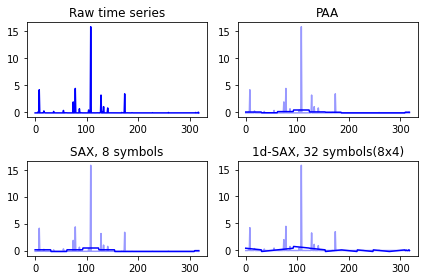

In [ ]:
#visualization of just ts_bot time series
plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts_bot[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv1[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv1[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv1[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

We can compare the 2 time series.

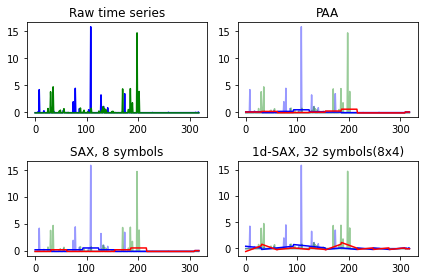

In [ ]:
plt.figure()
plt.subplot(2, 2, 1)  
plt.plot(ts_bot[0].ravel(), "b-")
plt.plot(ts_human[0].ravel(), "g-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(ts_human[0].ravel(), "g-", alpha=0.4)
plt.plot(paa_dataset_inv1[0].ravel(), "b-")
plt.plot(paa_dataset_inv2[0].ravel(), "r-")
plt.title("PAA")

plt.subplot(2, 2, 3) 
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(ts_human[0].ravel(), "g-", alpha=0.4)
plt.plot(sax_dataset_inv1[0].ravel(), "b-")
plt.plot(sax_dataset_inv2[0].ravel(), "r-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  
plt.plot(ts_bot[0].ravel(), "b-", alpha=0.4)
plt.plot(ts_human[0].ravel(), "g-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv1[0].ravel(), "b-")
plt.plot(one_d_sax_dataset_inv2[0].ravel(), "r-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

We can see the difference between the 2 approximated time series by exploiting the compression function defined above.

In [ ]:
ts_bot_sax_enc = (' '.join([str(v) for v in ts_bot_sax1d])).encode('utf-8')
ts_human_sax_enc = (' '.join([str(v) for v in ts_human_sax1d])).encode('utf-8')

In [ ]:
CDM(ts_bot_sax_enc, ts_human_sax_enc)

0.7397260273972602

In [ ]:
ts_bot_paa_enc = (' '.join([str(v) for v in ts_bot_paa])).encode('utf-8')
ts_human_paa_enc = (' '.join([str(v) for v in ts_human_paa])).encode('utf-8')

In [ ]:
CDM(ts_bot_paa_enc, ts_human_paa_enc)

0.7823529411764706